# Analizador de reseñas de Amazon en español

# 1. Leer un archivo .json desde Python

Trabajaremos con dos archivos. Los dos contienen reseñas de usuarios de Amazon.
La diferencia entre ambos archivos es que uno lo usaremos para entrenar un modelo de aprendizaje automático, y el otro para probar los resultados de ese modelo entrenado. Un archivo sirve para el aprendizaje, mientras que el otro se usa para evaluación.

In [ ]:
# Importamos pandas para manejar con facilidad los archivos con las reseñas.
import pandas as pd

# Abre un archivo con extensión "".json". Se guardan en una variable.
datos_originales = pd.read_json('/content/drive/MyDrive/NLP/Intro a PLN/NLP - UNAM 2021/dataset_es_train.json', lines=True)

# Imprime los contenidos de la variable recién creada.
datos_originales

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes
...,...,...,...,...,...,...,...,...
199995,es_0715276,product_es_0317036,reviewer_es_0643604,5,Mando funciona perfectamente y cumple con toda...,Tal y como se describe,es,electronics
199996,es_0085190,product_es_0622919,reviewer_es_0466173,5,"Compré la batería con cierta reticencia, pero ...",Funciona perfectamente,es,electronics
199997,es_0484496,product_es_0358101,reviewer_es_0330744,5,Buena calidad. Satisfecha con la compra.,Buena calidad.,es,apparel
199998,es_0930141,product_es_0788855,reviewer_es_0694290,5,Perfecto para el cumple de mi hijo,Recomendado,es,toy


In [ ]:
# Imprime sólo las primeras diez líneas dentro de la columna
# 'review_title' del archivo cargado previamente.
datos_originales['review_title'].head(n=10)

0                                     television Nevir
1            Dinero tirado a la basura con esta compra
2    solo llega una unidad cuando te obligan a comp...
3                                PRODUCTO NO RECIBIDO.
4                                             Devuelto
5                                       Jamás me llegó
6                                         Horroroso!!!
7                                       Poco funcional
8                                          No me llego
9                             Mala calidad, defectuoso
Name: review_title, dtype: object

In [ ]:
# Imprime sólo las últimas diez líneas dentro de la columna
# 'review_title' del archivo cargado previamente.
datos_originales['review_title'].tail(n=10)

199990                     Julio
199991               Muy cómodo!
199992                  Muy bien
199993          La droga +dura 2
199994                    Precio
199995    Tal y como se describe
199996    Funciona perfectamente
199997            Buena calidad.
199998               Recomendado
199999                 Preciosas
Name: review_title, dtype: object

# 2. Limpieza de los datos con ayuda de funciones 

In [ ]:
# Función que toma una variable con datos, y el nombre de la columna cuyo texto
# queremos limpiar. La función regresa datos limpios.
def limpia_texto(datos, columna):
    # Quita todas las ocurrencias de "http/S".
    datos[columna] = datos[columna].str.replace(r"http\S+", "")
    # Quita todas las ocurrencias de "http"
    datos[columna] = datos[columna].str.replace(r"http", "")
    # Quita todas las ocurrencias de "@".
    datos[columna] = datos[columna].str.replace(r"@\S+", "")
    # Cambia todas las ocurrencias de 
    datos[columna] = datos[columna].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    # Reemplaza los "@" por "at".
    datos[columna] = datos[columna].str.replace(r"@", "at")
    # Pasa todo a minúsculas.
    datos[columna] = datos[columna].str.lower()
    return datos

In [ ]:
# Creamos una variable que va a guardar el resultado de aplicar la
# función limpia_texto a la columna "review_title" en los datos originales.
resenas = limpia_texto(datos_originales, 'review_title')

# Pasamos a formato ".csv" los datos. Esto por conveniencia al usar pandas.
resenas.to_csv("datos_limpios.csv")

# Imprime las primeras diez líneas dentro de la variable con datos limpios.
resenas.head(n=10)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",producto no recibido,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,devuelto,es,shoes
5,es_0779978,product_es_0103315,reviewer_es_0304973,1,Jamás me llegó y el vendedor nunca contacto co...,jam s me lleg,es,home
6,es_0591840,product_es_0880915,reviewer_es_0642702,1,"El paraguas es de muy mala calidad,da la sensa...",horroroso!!!,es,luggage
7,es_0173297,product_es_0814677,reviewer_es_0895784,1,Tuve que devolverla porque al ser triangular n...,poco funcional,es,office_product
8,es_0101300,product_es_0654228,reviewer_es_0789283,1,Estoy esperando despues de protestar varias ve...,no me llego,es,electronics
9,es_0487007,product_es_0877793,reviewer_es_0986278,1,"Defectuoso. En apariencia muy bien producto, p...","mala calidad, defectuoso",es,kitchen


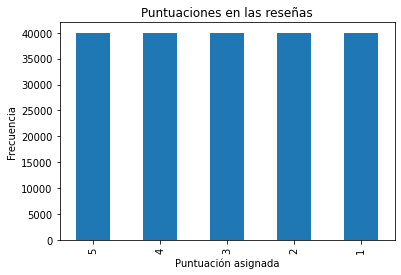

In [ ]:
# Graficamos los valores de la columna 'stars' de la
# variable resenas. Esto con el fin de visualizar mejor su lo distribución.
# Nos ayudamos de la librería matplotlib, que sirve para graficar en Python.
import matplotlib.pyplot as plt

datos = resenas['stars'].value_counts().plot(kind='bar')
figura = datos.get_figure()

plt.xlabel('Puntuación asignada')
plt.ylabel('Frecuencia')
plt.title('Puntuaciones en las reseñas')

plt.show()

In [ ]:
# Usamos la función drop para quitar las columnas que no vamos a utilizar.
# El término inplace=True le indica a pandas que estos cambios deben ser guardados.
# Si no se especifica inplace=True, las columnas no se quitan definintivamente.
# En este caso sí las borramos, pues no nos servirán para entrenar nuestro modelo.
resenas.drop(['review_id', 'product_id', 'reviewer_id', 'language'], axis=1, inplace=True)

# Imprime las primeras 5 filas en nuestra variable con datos.
resenas.head()

,stars,review_body,review_title,product_category
0,1,Nada bueno se me fue ka pantalla en menos de 8...,television nevir,electronics
1,1,"Horrible, nos tuvimos que comprar otro porque ...",dinero tirado a la basura con esta compra,electronics
2,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,drugstore
3,1,"No entro en descalificar al vendedor, solo pue...",producto no recibido,wireless
4,1,Llega tarde y co la talla equivocada,devuelto,shoes


In [ ]:
# Imprime las dimensiones de los datos. Tenemos 200,000 filas y 4 columnas.
resenas.shape

(200000, 4)

In [ ]:
# Usamos la función drop para quitar todas las reseñas después de la fila 5000.
resenas.drop(resenas.index[5000:], inplace=True)

In [ ]:
# Revisamos la variable después de los cambios.
resenas

,stars,review_body,review_title,product_category
0,1,Nada bueno se me fue ka pantalla en menos de 8...,television nevir,electronics
1,1,"Horrible, nos tuvimos que comprar otro porque ...",dinero tirado a la basura con esta compra,electronics
2,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,drugstore
3,1,"No entro en descalificar al vendedor, solo pue...",producto no recibido,wireless
4,1,Llega tarde y co la talla equivocada,devuelto,shoes
...,...,...,...,...
4995,1,"El envió nefasto, no estaba en casa y me tirar...",emc,home
4996,1,"La calidad es pésima, si fueran un poco peores...",no los recomiendo,other
4997,1,La maleta me gustó pero infelizmente se rompió...,bonita pero fr gil,luggage
4998,1,No me convence nada. No llega a cubrir toda la...,nagore,wireless


## 2. spaCy para análisis de las reseñas

In [ ]:
# Bajamos a la notebook el modelo de spaCy pre-entrenado en español.
# Esto nos permitirá hacer la extracción automática de tokens, entidades
# nombradas, etc.
! python -m spacy download es_core_news_sm

     |████████████████████████████████| 16.2 MB 5.2 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')


In [ ]:
# Cargamos el modelo de spaCy pre-entrenado en español.
import spacy
import es_core_news_sm

nlp = es_core_news_sm.load()

In [ ]:
# La función type nos dice qué tipo de variable tenemos. En este caso, la columna
# 'review_body' de la variable resenas contiene variables del tipo "Series".
type(resenas['review_body'])

pandas.core.series.Series

In [ ]:
# Creamos un diccionario llamado "columnas" que contendrá los nombres de las 
# nuevas columnas, y listas vacías que llenaremos después con los tokens.
columnas = {'Tokens de Reseñas': [],
            'Tokens de Títulos': [], 
            'Tokens de categoria de productos': [],
            'Puntuación': []}

# Creamos una nueva variable llamada "resenas_nlp" que contendrá un pandas
# DataFrame con las columnas especificadas en el diccionario anterior.
resenas_nlp = pd.DataFrame(columnas)

# Revisamos la nueva variable --el nuevo pandas DataFrame.
resenas_nlp

,Tokens de Reseñas,Tokens de Títulos,Tokens de categoria de productos,Puntuación


In [ ]:
# Pasamos la columna 'review_body' de la variable 'resenas' por el modelo 
# nlp en español de spaCy que precargamos unas celdas arriba. Guardamos el
# resultado en la columna "Tokens de Reseñas" dentro de la variable "resenas_nlp".
resenas_nlp['Tokens de Reseñas'] = resenas['review_body'].apply(lambda x: nlp(x))

In [ ]:
resenas_nlp.drop(['Puntuación'], axis=1, inplace=True)

In [ ]:
# Revisamos los cambios en el DataFrame "resenas_nlp"
resenas_nlp

,Tokens de Reseñas,Tokens de Títulos,Tokens de categoria de productos
0,"(Nada, bueno, se, me, fue, ka, pantalla, en, m...","(television, nevir)",(electronics)
1,"(Horrible, ,, nos, tuvimos, que, comprar, otro...","(dinero, tirado, a, la, basura, con, esta, com...",(electronics)
2,"(Te, obligan, a, comprar, dos, unidades, y, te...","(solo, llega, una, unidad, cuando, te, obligan...",(drugstore)
3,"(No, entro, en, descalificar, al, vendedor, ,,...","(producto, no, recibido)",(wireless)
4,"(Llega, tarde, y, co, la, talla, equivocada)",(devuelto),(shoes)
...,...,...,...
4995,"(El, envió, nefasto, ,, no, estaba, en, casa, ...",(emc),(home)
4996,"(La, calidad, es, pésima, ,, si, fueran, un, p...","(no, los, recomiendo)",(other)
4997,"(La, maleta, me, gustó, pero, infelizmente, se...","(bonita, pero, fr, gil)",(luggage)
4998,"(No, me, convence, nada, ., No, llega, a, cubr...",(nagore),(wireless)


In [ ]:
# Repetimos el proceso anterior pero para la columna 'review_title'.
resenas_nlp['Tokens de Títulos'] = resenas['review_title'].apply(lambda x: nlp(x))

In [ ]:
# Repetimos el proceso anterior pero para la columna 'product_category'.
resenas_nlp['Tokens de categoria de productos'] = resenas['product_category'].apply(lambda x: nlp(x))

In [ ]:
# Finalmente, tenenos un pandas DataFrame con tokens de las reseñas, los títulos
# de las reseñas, los tokens de categorías de productos, y las puntuaciones
# de cada reseña, en la variable "resenas_nlp".
resenas_nlp

,Tokens de Reseñas,Tokens de Títulos,Tokens de categoria de productos
0,"(Nada, bueno, se, me, fue, ka, pantalla, en, m...","(television, nevir)",(electronics)
1,"(Horrible, ,, nos, tuvimos, que, comprar, otro...","(dinero, tirado, a, la, basura, con, esta, com...",(electronics)
2,"(Te, obligan, a, comprar, dos, unidades, y, te...","(solo, llega, una, unidad, cuando, te, obligan...",(drugstore)
3,"(No, entro, en, descalificar, al, vendedor, ,,...","(producto, no, recibido)",(wireless)
4,"(Llega, tarde, y, co, la, talla, equivocada)",(devuelto),(shoes)
...,...,...,...
4995,"(El, envió, nefasto, ,, no, estaba, en, casa, ...",(emc),(home)
4996,"(La, calidad, es, pésima, ,, si, fueran, un, p...","(no, los, recomiendo)",(other)
4997,"(La, maleta, me, gustó, pero, infelizmente, se...","(bonita, pero, fr, gil)",(luggage)
4998,"(No, me, convence, nada, ., No, llega, a, cubr...",(nagore),(wireless)


# 3. Exploración de características lingüísticas

In [ ]:
# Inspeccionamos el contenido de la fila 0 y la columna 'Tokens de Reseñas'
# de la variable resenas_nlp.
resenas_nlp['Tokens de Reseñas'][2000]

El envío y la presentación del producto, así como los accesorios todo correcto. La colocación del cristal protector se realiza sin problemas, pero sólo lleva algo de pega por los bordes y la fijación no es buena, y acaba moviéndose, adicionalmente pierde la sensibilidad del teclado táctil, por lo que hay que presionar con fuerza, especialmente en los bordes.

In [ ]:
# Saca las oraciones segmentadas de una reseña en particular.
sentence_spans = list(resenas_nlp['Tokens de Reseñas'][2000].sents)
sentence_spans

[El envío y la presentación del producto, así como los accesorios todo correcto.,
 La colocación del cristal protector se realiza sin problemas, pero sólo lleva algo de pega por los bordes y la fijación no es buena, y acaba moviéndose, adicionalmente pierde la sensibilidad del teclado táctil, por lo que hay que presionar con fuerza, especialmente en los bordes.]

In [ ]:
# Inspeccionamos las tokens de la fila 0 y la columna 'Tokens de Reseñas'
# de la variable resenas_nlp.
for token in resenas_nlp['Tokens de Reseñas'][0]:
  print(token.text, token.pos_, spacy.explain(token.pos_))

Nada PRON pronoun
bueno ADJ adjective
se PRON pronoun
me PRON pronoun
fue AUX auxiliary
ka ADV adverb
pantalla NOUN noun
en ADP adposition
menos ADV adverb
de ADP adposition
8 NUM numeral
meses NOUN noun
y CONJ conjunction
no ADV adverb
he AUX auxiliary
recibido VERB verb
respuesta NOUN noun
del ADP adposition
fabricante NOUN noun


In [ ]:
# Inspeccionamos las tokens de la fila 0 y la columna 'Tokens de Reseñas'
# de la variable resenas_nlp.
for token in resenas_nlp['Tokens de Reseñas'][0]:
  print(token.text, token.pos_, token.tag_)

Nada PRON PRON__Number=Sing|PronType=Ind
bueno ADJ ADJ__Gender=Masc|Number=Sing
se PRON PRON__Person=3
me PRON PRON__Number=Sing|Person=1|PronType=Prs
fue AUX AUX__Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin
ka ADV ADV__Polarity=Neg
pantalla NOUN NOUN__Gender=Fem|Number=Sing
en ADP ADP__AdpType=Prep
menos ADV ADV___
de ADP ADP__AdpType=Prep
8 NUM NUM__NumForm=Digit
meses NOUN NOUN__Gender=Masc|Number=Plur
y CONJ CCONJ___
no ADV ADV__Polarity=Neg
he AUX AUX__Mood=Ind|Number=Sing|Person=1|Tense=Pres|VerbForm=Fin
recibido VERB VERB__Gender=Masc|Number=Sing|Tense=Past|VerbForm=Part
respuesta NOUN NOUN__Gender=Fem|Number=Sing
del ADP ADP__AdpType=Preppron|Gender=Masc|Number=Sing
fabricante NOUN NOUN__Number=Sing


In [ ]:
# Inspeccionamos las tokens de la fila 0 y la columna 'Tokens de Reseñas'
# de la variable resenas_nlp.
for token in resenas_nlp['Tokens de Reseñas'][0]:
  print(token.text, token.is_alpha, token.is_stop, token.is_punct)

Nada True True False
bueno True True False
se True True False
me True True False
fue True True False
ka True False False
pantalla True False False
en True True False
menos True True False
de True True False
8 False False False
meses True False False
y True False False
no True True False
he True True False
recibido True False False
respuesta True False False
del True True False
fabricante True False False


In [ ]:
# Importamos displacy para visualizar cómo spaCy está haciendo el análisis.
from spacy import displacy
displacy.render(resenas_nlp['Tokens de Reseñas'][10], style='dep', jupyter=True)

In [ ]:
# De nuevo, definimos un diccionario con los nombres de las columnas de un nuevo
# DataFrame que utilizaremos. El nuevo DataFrame contendrá tokens clasificados
# de acuerdo a la información sintáctica que contengan.
cols = {'Texto': [],
        'Parte del discurso': [],
        '¿Es token alfanumérico ?': [],
        '¿Es token de puntuación ?': [],
        '¿Es palabra de alto (stop-word) ?': []}

# Sacamos los tokens de la columna 'Tokens de Reseñas' y los guardamos en el 
# diccionario de recién creación. Específicamente, en la lista con la llave
# nombrada "Texto".
for i in range(len(resenas_nlp['Tokens de Reseñas'])):
  for token in resenas_nlp['Tokens de Reseñas'][i]:
    cols['Texto'].append(token.text)

In [ ]:
# Revisamos el diccionario después de los tokens que le agregamos a la columna
# "Texto".
cols

In [ ]:
# Repetimos el mismo proceso de arriba, pero ahora sacamos diferentes tokens
# de las columnas de la variable resenas_nlp, y los vamos guardando en los
# campos vacíos del diccionario.
for i in range(len(resenas_nlp['Tokens de Reseñas'])):
  for token in resenas_nlp['Tokens de Reseñas'][i]:
    cols['Parte del discurso'].append(token.pos_)
    cols['¿Es token alfanumérico ?'].append(token.is_alpha)
    cols['¿Es token de puntuación ?'].append(token.is_punct)
    cols['¿Es palabra de alto (stop-word) ?'].append(token.is_stop)

In [ ]:
# Pasamos el diccionario "cols" a un pandas DataFrame. Nos ayudamos de
# la función "DataFrame" de pandas.
caracteristicas_linguisticas = pd.DataFrame(cols)

In [ ]:
# Revisamos nuestra variable "caracteristicas_linguisticas" que contiene
# al nuevo DataFrame con tokens de diversos tipos separados por columnas.
caracteristicas_linguisticas

,Texto,Parte del discurso,¿Es token alfanumérico ?,¿Es token de puntuación ?,¿Es palabra de alto (stop-word) ?
0,Nada,PRON,True,False,True
1,bueno,ADJ,True,False,True
2,se,PRON,True,False,True
3,me,PRON,True,False,True
4,fue,AUX,True,False,True
...,...,...,...,...,...
158158,a,ADP,True,False,False
158159,las,DET,True,False,True
158160,2,NUM,False,False,False
158161,horas,NOUN,True,False,True


In [ ]:
# Revisamos cuáles son los contenidos de la columna 'Parte del discurso' de la
# variable caracteristicas_linguisticas. La función value_counts nos da 
# la cuenta de las veces que aparece un string único dentro de la columna especificada.
caracteristicas_linguisticas['Parte del discurso'].value_counts()

NOUN     25300
VERB     19794
DET      17951
ADP      16687
PUNCT    15123
ADV      13857
PRON     12703
AUX       9076
ADJ       9053
CONJ      6936
SCONJ     5230
PROPN     4047
NUM       2297
SYM         51
INTJ        37
PART        21
Name: Parte del discurso, dtype: int64

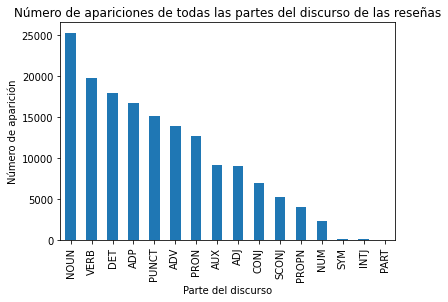

In [ ]:
# Graficamos los valores de la columna 'Parte del discurso' de la
# variable caracteristicas_linguisticas. Esto con el fin de visualizar
# lo que en la celda anterior obtuvimos. Nos ayudamos de la librería
# matplotlib, que sirve para graficar en Python.
import matplotlib.pyplot as plt

# Definimos a los datos de la figura, y el tipo de figura que queremos.
datos = caracteristicas_linguisticas['Parte del discurso'].value_counts().plot(kind='bar')
# Obtenemos la figura con ayuda de la función get_figure de matplotlib.
figura = datos.get_figure()

# La función xlabel nos permite nombrar al eje x en nuestro gráfico.
plt.xlabel('Parte del discurso')
# La función ylabel nos permite nombrar al eje y en nuestro gráfico.
plt.ylabel('Número de aparición')
# La función title nos permite nombrar al título de nuestro gráfico.
plt.title('Número de apariciones de todas las partes del discurso de las reseñas')
# La función show nos despliega en pantalla el gráfico con todas las
# características especificadas anteriormente.
plt.show()

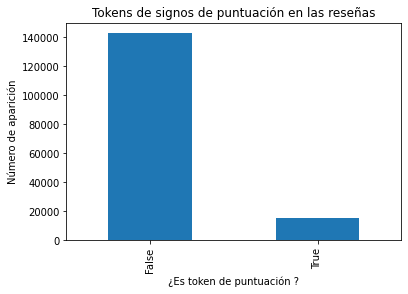

In [ ]:
# Repetimos el mismo proceso pero ahora para los tokens de la columna '¿Es token de puntuación ?'.
datos = caracteristicas_linguisticas['¿Es token de puntuación ?'].value_counts().plot(kind='bar')
figura = datos.get_figure()

plt.xlabel('¿Es token de puntuación ?')
plt.ylabel('Número de aparición')
plt.title('Tokens de signos de puntuación en las reseñas')

plt.show()

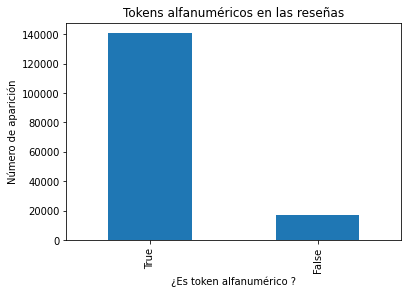

In [ ]:
# Repetimos el mismo proceso pero ahora para los tokens de la columna '¿Es token alfanumérico ?'.
datos = caracteristicas_linguisticas['¿Es token alfanumérico ?'].value_counts().plot(kind='bar')
figura = datos.get_figure()

plt.xlabel('¿Es token alfanumérico ?')
plt.ylabel('Número de aparición')
plt.title('Tokens alfanuméricos en las reseñas')

plt.show()

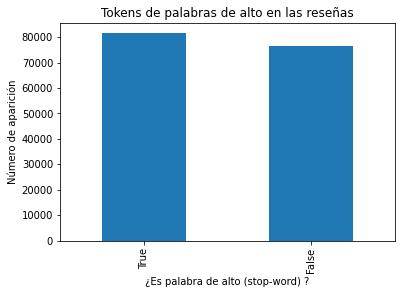

In [ ]:
# Repetimos el mismo proceso pero ahora para los tokens de la columna 
# '¿Es palabra de alto (stop-word) ?'.
datos = caracteristicas_linguisticas['¿Es palabra de alto (stop-word) ?'].value_counts().plot(kind='bar')
figura = datos.get_figure()

plt.xlabel('¿Es palabra de alto (stop-word) ?')
plt.ylabel('Número de aparición')
plt.title('Tokens de palabras de alto en las reseñas')

plt.show()